In [1]:

import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plastic=pd.read_csv("PlasticSales.csv")


In [5]:
plastic.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [6]:
plastic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   60 non-null     object
 1   Sales   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [7]:
plastic.isnull().sum()

Month    0
Sales    0
dtype: int64

In [8]:
plastic.shape

(60, 2)

In [9]:
plastic.size

120

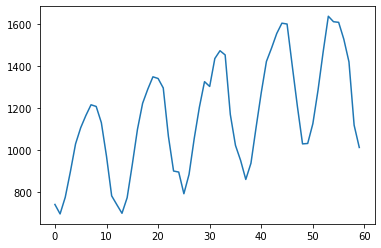

In [10]:
plastic.Sales.plot()

In [11]:
plastic

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030
5,Jun-49,1107
6,Jul-49,1165
7,Aug-49,1216
8,Sep-49,1208
9,Oct-49,1131


In [14]:
plastic["Date"]=pd.to_datetime(plastic.Month,format="%b-%y")

In [15]:
plastic["month"] = plastic.Date.dt.strftime("%b") # month extraction
plastic["year"] = plastic.Date.dt.strftime("%Y") # year extraction

#plastic["Day"] = plastic.Date.dt.strftime("%d") # Day extraction
#plastic["wkday"] = plastic.Date.dt.strftime("%A") # weekday extraction


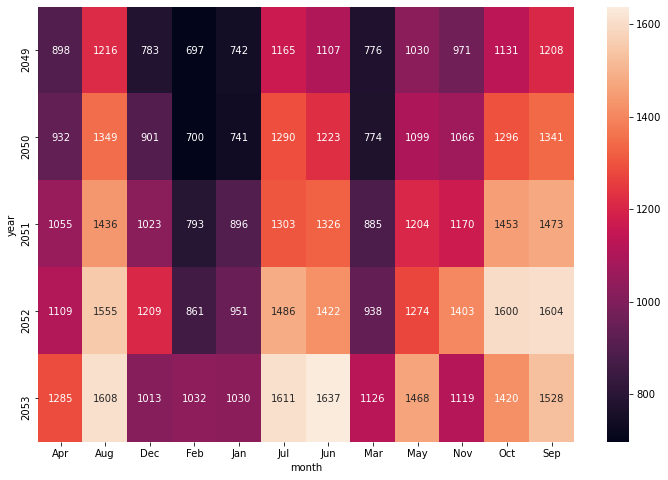

In [17]:
plt.figure(figsize=(12,8))
plot_y_month = pd.pivot_table(data=plastic,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(plot_y_month,annot=True,fmt="g") #fmt is format of the grid values


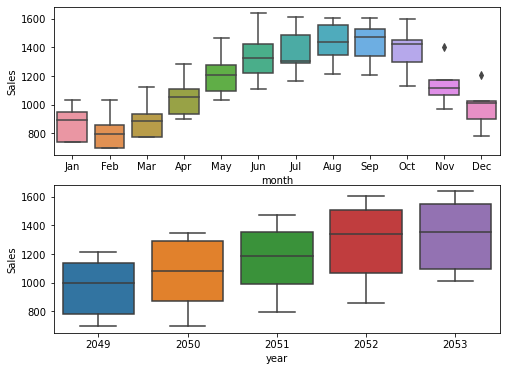

In [18]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Sales",data=plastic)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=plastic)


In [19]:
import numpy as np
p = plastic["Month"][0]
p[0:3]
plastic['months']= 0


In [20]:
for i in range(60):
    p = plastic["Month"][i]
    plastic['months'][i]= p[0:3]
    

<ipython-input-20-db306737992b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plastic['months'][i]= p[0:3]
C:\Users\sathya\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [21]:
month_dummies = pd.DataFrame(pd.get_dummies(plastic['months']))
plastic1 = pd.concat([plastic,month_dummies],axis = 1)


In [22]:
t=np.arange(1,61)
plastic1['t']=t
t_square=plastic1['t']*plastic1['t']
plastic1['t_square']=t_square


In [23]:
log_Sales=np.log(plastic1['Sales'])

In [24]:
plastic1['log_Sales']=log_Sales

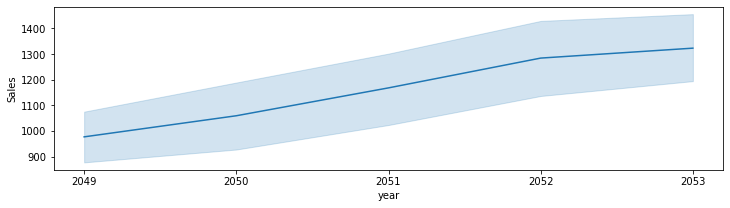

In [25]:

plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=plastic)


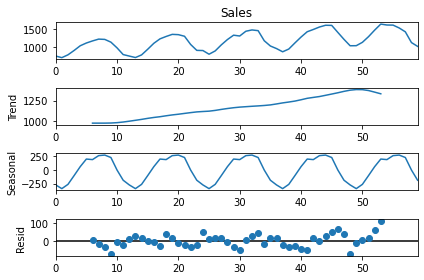

In [26]:

decompose_ts_add = seasonal_decompose(plastic.Sales,period=12)
decompose_ts_add.plot()
plt.show()


In [27]:
Train=plastic1.head(48)
Test=plastic1.tail(12)


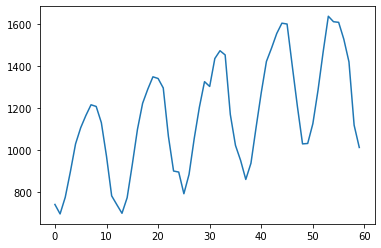

In [28]:
plastic1.Sales.plot()

In [42]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
print("Linear Model",rmse_linear)


Linear Model 260.93781425111206


In [41]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
print("Exponential",rmse_Exp)



Exponential 268.69383850025605


In [40]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
print("Quadratic",rmse_Quad)



Quadratic 297.4067097272056


In [38]:
#Additive seasonality 

add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
print("Additive Seasonality :",rmse_add_sea)


Additive Seasonality : 235.60267356646509


In [39]:

#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
print("Additive Seasonality Quadratic:",rmse_add_sea_quad)



Additive Seasonality Quadratic: 218.19387584898945


In [36]:

Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
print("Multiplicative Seasonality:",rmse_Mult_sea)



Multiplicative Seasonality: 239.6543214312083


In [45]:

#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("Multiplicative Additive Seasonality :",rmse_Mult_add_sea) 



Multiplicative Additive Seasonality : 160.68332947192974


In [46]:

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])


,MODEL,RMSE_Values
6,rmse_Mult_add_sea,160.683329
4,rmse_add_sea_quad,218.193876
3,rmse_add_sea,235.602674
5,rmse_Mult_sea,239.654321
0,rmse_linear,260.937814
1,rmse_Exp,268.693839
2,rmse_Quad,297.406710


In [48]:
poly = pd.read_excel(r"C:\\Users\\sathya\\Documents\\assignments\\New_PlasticSales.xlsx")

In [51]:
model = smf.ols('Sales~t+t_square',data=plastic1).fit()

In [54]:
pred_new = pd.Series(model.predict(poly))
pred_new

0     1390.004325
1     1394.900833
2     1399.673130
3     1404.321216
4     1408.845091
5     1413.244756
6     1417.520210
7     1421.671453
8     1425.698485
9     1429.601307
10    1433.379918
dtype: float64

In [56]:


poly["forecasted_Sales"] = pd.Series(pred_new)
poly



,Month,t,t_square,forecasted_Sales
0,1954-01-01,61,3721,1390.004325
1,1954-02-01,62,3844,1394.900833
2,1954-03-01,63,3969,1399.673130
3,1954-04-01,64,4096,1404.321216
4,1954-05-01,65,4225,1408.845091
5,1954-06-01,66,4356,1413.244756
6,1954-07-01,67,4489,1417.520210
7,1954-08-01,68,4624,1421.671453
8,1954-09-01,69,4761,1425.698485
9,1954-10-01,70,4900,1429.601307
